In [25]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


# .env 読み込み
print(r"..\environment\.env")
load_dotenv(dotenv_path=r'..\environment/.env',override=True)

# =========================
# 🔐 Metabase 認証・データ取得
# =========================

login_url = "https://metabase.tr-com.net/api/session"
username = os.getenv("MB_USERNAME", "").strip()
password = os.getenv("MB_PASSWORD", "").strip()

if not username or not password:
    raise ValueError("❌ MB_USERNAME または MB_PASSWORD が設定されていません")

print(f"ログイン試行中 → username: '{username}'")

response = requests.post(login_url, json={"username": username, "password": password})
if response.status_code == 200:
    session_id = response.json().get("id")
    print("✅ ログイン成功")
else:
    raise Exception(f"❌ ログイン失敗: {response.status_code}, {response.text}")


..\environment\.env
ログイン試行中 → username: 'y-nitta@torishima.co.jp'
✅ ログイン成功


In [26]:

# データ取得
url = "https://metabase.tr-com.net/api/card/2070/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [27]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfori = pd.DataFrame(data)
        if dfori.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(dfori.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
   SensorId                               AssetId SensorType Orientation
0  EC10017B  e7877c64-7407-4375-ad20-206b5d0f89c2          M           2
1  EC1001B2  04fa37c4-89f8-4e46-a2dc-37c6b0c53c76          M           2
2  EC1003CA  867c50e0-9b92-43e1-ab1c-bc784040ea28          M           2
3  EC1003CE  d672d87c-055f-4c06-85fa-b2a502d6d8f5          M           2
4  EC1003E0  a8eae6a7-ecdb-4959-9d8b-50db3619e680          M           2


In [28]:

# データ取得
url = "https://metabase.tr-com.net/api/card/2071/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [29]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfpump = pd.DataFrame(data)
        if dfpump.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(dfpump.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
                                AssetId      Model  ModelCode
0  000c617f-2bdf-4e56-87b1-659f90586ad0  CAL32-125          7
1  00b9e08c-72af-4edc-8471-464e30fdb7d3        CDM          5
2  00bbdac6-ab6a-446f-9541-ee9bb2ffb28d  MMTV200/5          2
3  00c79c40-1525-44cb-bc22-ba387c0f46c5    MMO65/7          8
4  00d079ed-e148-4553-a200-30a981b4d3c2    MMO65/7          8


In [30]:
dfori

,SensorId,AssetId,SensorType,Orientation
0,EC10017B,e7877c64-7407-4375-ad20-206b5d0f89c2,M,2
1,EC1001B2,04fa37c4-89f8-4e46-a2dc-37c6b0c53c76,M,2
2,EC1003CA,867c50e0-9b92-43e1-ab1c-bc784040ea28,M,2
3,EC1003CE,d672d87c-055f-4c06-85fa-b2a502d6d8f5,M,2
4,EC1003E0,a8eae6a7-ecdb-4959-9d8b-50db3619e680,M,2
...,...,...,...,...
2743,XVXP1VB2BEAA71343EA01D6D5F,1acb71e4-2707-44b2-9c76-8ae9cc694fab,M,2
2744,XVXP1VB3AA6C81348D11528858,c2e45286-866a-4512-b8cf-fd8c6355d85c,M,2
2745,XVXP1VB3C0DC613465B457BA21,ec87341b-4bf4-4da2-b918-fd0e49f452d8,M,2
2746,XVXP1VB9E6D4B13465B4233240,fb087902-62aa-411a-ae6d-6fb9cd852edc,M,2


In [31]:

dfori = dfori.drop_duplicates(subset='AssetId', keep='first')
dfori 


,SensorId,AssetId,SensorType,Orientation
0,EC10017B,e7877c64-7407-4375-ad20-206b5d0f89c2,M,2
1,EC1001B2,04fa37c4-89f8-4e46-a2dc-37c6b0c53c76,M,2
2,EC1003CA,867c50e0-9b92-43e1-ab1c-bc784040ea28,M,2
3,EC1003CE,d672d87c-055f-4c06-85fa-b2a502d6d8f5,M,2
4,EC1003E0,a8eae6a7-ecdb-4959-9d8b-50db3619e680,M,2
...,...,...,...,...
2717,XVVC003261134B298CC805,796c2cb8-f1a7-4ef5-9303-e4eec21336ce,M,1
2718,XVVC00327A134B2985A1833,f191d481-37d7-4a90-adce-6c3e5a43c9a2,M,1
2739,XVVC00433B134D88BE4553,14e9a7cf-61c1-46bd-bf34-258f0c7327e5,M,2
2740,XVVC00434D134D95231AA80,6561f9d9-0ec5-407e-8e3d-3c3c560be47a,M,2


In [32]:
dfori[dfori['AssetId'].duplicated(keep=False)]

,SensorId,AssetId,SensorType,Orientation


In [33]:
dfpump

,AssetId,Model,ModelCode
0,000c617f-2bdf-4e56-87b1-659f90586ad0,CAL32-125,7
1,00b9e08c-72af-4edc-8471-464e30fdb7d3,CDM,5
2,00bbdac6-ab6a-446f-9541-ee9bb2ffb28d,MMTV200/5,2
3,00c79c40-1525-44cb-bc22-ba387c0f46c5,MMO65/7,8
4,00d079ed-e148-4553-a200-30a981b4d3c2,MMO65/7,8
...,...,...,...
1484,ff93115d-beb3-4606-a7c4-72d60ff85c99,CDM350X300HN,5
1485,ff97c942-8eb3-47ec-89a5-e333614e36e6,CAL32-125,7
1486,ffa63aa5-8536-45c9-a38f-45f6daba94da,CDM700x600,5
1487,ffecef2d-70a2-44b3-9089-c54455d4943d,MHG4/6,3


In [34]:
dfpump[dfpump['AssetId'].duplicated(keep=False)]

,AssetId,Model,ModelCode


In [35]:

merged_df = pd.merge(dfpump, dfori, on='AssetId', how='inner')
print("マージ後件数:", len(merged_df))


マージ後件数: 213


In [36]:
merged_df

,AssetId,Model,ModelCode,SensorId,SensorType,Orientation
0,00bbdac6-ab6a-446f-9541-ee9bb2ffb28d,MMTV200/5,2,VB39B0E8,M,2
1,02a41c06-b19b-4a11-b505-3f9fd52e184a,MHD40/11E,1,VB9E7FA8,M,2
2,02bab784-8b07-4391-83a7-22fd6dfe05c9,CDM600X500KBA,5,VB89B403,M,2
3,030a1b28-d3dc-46a2-802b-30b8d87359e7,MHG5/11A,3,VC000F1E,M,2
4,03b12cb6-df67-40a1-928e-91ae6149d84d,CAM150-400,7,VB35DCB6,M,2
...,...,...,...,...,...,...
208,fe84ff53-4a3c-4dbd-9348-b330d5e172ee,MML40/6,9,VB6C5EB4,M,2
209,fe91b482-3e69-4177-b210-d909a2ffe185,CAR50-200,7,VBC353F0,M,2
210,ff7a14f4-c0ce-4e0d-81f7-e3ddd0a0c90a,MHG2/9,3,VB3A4993,M,2
211,ff8b6f63-1b9d-4db5-a08a-ef07c8110f0b,CAL200-250,7,VB8B4B10,M,2


In [37]:
merged_df[merged_df['SensorId'].duplicated(keep=False)]

,AssetId,Model,ModelCode,SensorId,SensorType,Orientation


In [38]:
import requests
import pandas as pd

# SensorId 一覧
sensor_ids = merged_df['SensorId'].dropna().tolist()

# Metabase API 情報
url = "https://metabase.tr-com.net/api/card/2072/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id  
}

# データ格納
results = []

# API ループ
for sid in sensor_ids:
    payload = {
        "parameters": [
            {
                "type": "category",
                "target": ["variable", ["template-tag", "sensorid"]],
                "value": sid
            }
        ]
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
            df = pd.DataFrame(data)
            if not df.empty:
                df["sensorid"] = sid  # sensorid 列として追加（小文字）
                results.append(df)
                print(f"✅ SensorId={sid}：取得成功")
            else:
                print(f"⚠️ SensorId={sid}：データなし")
        except Exception as e:
            print(f"❌ SensorId={sid}：JSON変換失敗 - {e}")
    else:
        print(f"❌ SensorId={sid}：リクエスト失敗 - {response.status_code}, {response.text}")

# 統合・整形
if results:
    dffft_all = pd.concat(results, ignore_index=True)

    # sensorid をキーに merged_df から Model + ModelCode を追加
    df_model = merged_df[['SensorId', 'ModelCode', 'Model']].rename(columns={'SensorId': 'sensorid'})
    final_df = pd.merge(dffft_all, df_model, on='sensorid', how='left')

    # 必要な列だけ抽出・並び替え
    final_df = final_df[['sensorid', 'ModelCode', 'Model', 'fftrecord_date', 'fftdatax']]


    # 結果の確認
    print("✅ 最終データフレーム作成完了")
    print(final_df.head())
else:
    raise ValueError("❌ 有効なデータが1件も取得できませんでした。")


✅ SensorId=VB39B0E8：取得成功
✅ SensorId=VB9E7FA8：取得成功
✅ SensorId=VB89B403：取得成功
✅ SensorId=VC000F1E：取得成功
✅ SensorId=VB35DCB6：取得成功
✅ SensorId=VB68F135：取得成功
✅ SensorId=VB3793A7：取得成功
✅ SensorId=VB393DC5：取得成功
✅ SensorId=VC000F2D：取得成功
✅ SensorId=VB2B314F：取得成功
⚠️ SensorId=XVVB36C1BC134893D4E883：データなし
✅ SensorId=VB0FC749：取得成功
✅ SensorId=VB686BD8：取得成功
✅ SensorId=VB68B648：取得成功
✅ SensorId=VBA2ACA6：取得成功
✅ SensorId=VC000EC4：取得成功
✅ SensorId=VB6C5E92：取得成功
✅ SensorId=VB28C465：取得成功
⚠️ SensorId=XVVB3754841343F0152A056：データなし
✅ SensorId=VB681364：取得成功
✅ SensorId=VB3B101D：取得成功
✅ SensorId=VB26E44B：取得成功
✅ SensorId=VB358750：取得成功
✅ SensorId=VB37A672：取得成功
⚠️ SensorId=XVVBC0671B134D6F462960：データなし
✅ SensorId=VB6B6710：取得成功
✅ SensorId=VBA0AE7F：取得成功
✅ SensorId=VB69D129：取得成功
✅ SensorId=VC000682：取得成功
✅ SensorId=VB6889E1：取得成功
⚠️ SensorId=XVVB9E4CF9134893D52B0B：データなし
✅ SensorId=VB0FC36E：取得成功
✅ SensorId=VB6D8DD6：取得成功
✅ SensorId=VBA4BA4A：取得成功
✅ SensorId=VB3938CA：取得成功
✅ SensorId=VB6B063B：取得成功
✅ SensorId=VB8895DE：取得成功
✅ SensorId

In [39]:
# CSVとして保存（文字化け防止にUTF-8 BOM付き）
final_df.to_csv("fft_model_data.csv", index=False, encoding='utf-8-sig')


In [40]:
print(final_df.shape)
print(final_df)


(28217, 5)
       sensorid  ModelCode       Model       fftrecord_date  \
0      VB39B0E8          2   MMTV200/5  2020-04-23T19:14:29   
1      VB39B0E8          2   MMTV200/5  2020-06-23T11:53:55   
2      VB39B0E8          2   MMTV200/5  2020-06-30T11:53:54   
3      VB39B0E8          2   MMTV200/5  2020-07-01T11:53:19   
4      VB39B0E8          2   MMTV200/5  2020-07-08T11:53:19   
...         ...        ...         ...                  ...   
28212  VB8BC173          5  CDM700x600  2022-05-09T05:46:12   
28213  VB8BC173          5  CDM700x600  2022-05-30T05:45:06   
28214  VB8BC173          5  CDM700x600  2022-06-06T05:43:47   
28215  VB8BC173          5  CDM700x600  2022-06-20T05:42:50   
28216  VB8BC173          5  CDM700x600  2022-07-04T05:42:08   

                                                fftdatax  
0      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
1      0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.02...  
2      0.03,0.01,0.01,0,0,0,0,0,0,0.01,0,0.01,0.02,0...

In [41]:
# 件数をカウントして表示（降順）
print(final_df['ModelCode'].value_counts().sort_index())


ModelCode
1      695
2      484
3     1539
4      143
5     2631
7    20815
8      252
9     1658
Name: count, dtype: int64


In [42]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# === 特徴量保存用リスト ===
features = []

# === 1行ずつ処理してリストに追加 ===
for i, row in final_df.iterrows():
    try:
        arr = np.array(list(map(float, row['fftdatax'].split(','))))
        power_spectrum = arr ** 2
        norm_ps = power_spectrum / (np.sum(power_spectrum) + 1e-8)
        N = len(arr)
        freqs = np.arange(N)

        basic = {
            'mean': np.mean(arr),
            'std': np.std(arr),
            'max': np.max(arr),
            'min': np.min(arr),
            'median': np.median(arr),
            'peak_ratio': np.max(arr) / (np.mean(arr) + 1e-8),
            'energy': np.sum(arr**2),
        }

        spectral = {
            'spectral_centroid': np.sum(freqs * power_spectrum) / (np.sum(power_spectrum) + 1e-8),
            'spectral_entropy': entropy(norm_ps),
            'spectral_flatness': np.exp(np.mean(np.log(arr + 1e-8))) / (np.mean(arr) + 1e-8),
            'low_freq_energy': np.sum(power_spectrum[:N//3]),
            'mid_freq_energy': np.sum(power_spectrum[N//3:2*N//3]),
            'high_freq_energy': np.sum(power_spectrum[2*N//3:])
        }

        feature_row = {
            'sensorid': row['sensorid'],
            'ModelCode': row['ModelCode'],
            'Model': row['Model'],
            'fftrecord_date': row['fftrecord_date'],
            **basic,
            **spectral
        }

        features.append(feature_row)

        if i % 500 == 0:
            print(f"{i} rows processed...")

    except Exception as e:
        print(f"Error processing row {i}: {e}")

# === 最後に DataFrame にまとめて保存 ===
feature_df = pd.DataFrame(features)
feature_df.to_csv('fft_features_output.csv', index=False)
print("特徴量抽出完了: fft_features_output.csv に保存しました。")


0 rows processed...
500 rows processed...
1000 rows processed...
1500 rows processed...
2000 rows processed...
2500 rows processed...
3000 rows processed...
3500 rows processed...
4000 rows processed...
4500 rows processed...
5000 rows processed...
5500 rows processed...
6000 rows processed...
6500 rows processed...
7000 rows processed...
7500 rows processed...
8000 rows processed...
8500 rows processed...
9000 rows processed...
9500 rows processed...
10000 rows processed...
10500 rows processed...
11000 rows processed...
11500 rows processed...
12000 rows processed...
12500 rows processed...
13000 rows processed...
13500 rows processed...
14000 rows processed...
14500 rows processed...
15000 rows processed...
15500 rows processed...
16000 rows processed...
16500 rows processed...
17000 rows processed...
17500 rows processed...
18000 rows processed...
18500 rows processed...
19000 rows processed...
19500 rows processed...
20000 rows processed...
20500 rows processed...
21000 rows proce

In [43]:
feature_df

,sensorid,ModelCode,Model,fftrecord_date,mean,std,max,min,median,peak_ratio,energy,spectral_centroid,spectral_entropy,spectral_flatness,low_freq_energy,mid_freq_energy,high_freq_energy
0,VB39B0E8,2,MMTV200/5,2020-04-23T19:14:29,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.0000,0.000000,NaN,1.000000,0.0000,0.0000,0.0000
1,VB39B0E8,2,MMTV200/5,2020-06-23T11:53:55,0.000149,0.001345,0.03,0.0,0.00,201.328770,0.0183,672.502365,4.660049,0.000081,0.0183,0.0000,0.0000
2,VB39B0E8,2,MMTV200/5,2020-06-30T11:53:54,0.005416,0.012075,0.43,0.0,0.00,79.394240,1.7514,4919.621532,6.148217,0.000255,0.4741,0.6135,0.6638
3,VB39B0E8,2,MMTV200/5,2020-07-01T11:53:19,0.001409,0.003925,0.05,0.0,0.00,35.485909,0.1739,5143.167042,6.881549,0.000041,0.0448,0.0529,0.0762
4,VB39B0E8,2,MMTV200/5,2020-07-08T11:53:19,0.004851,0.011682,0.44,0.0,0.00,90.702761,1.5999,4909.170230,5.746624,0.000215,0.3780,0.6433,0.5786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,VB8BC173,5,CDM700x600,2022-05-09T05:46:12,0.000030,0.000599,0.02,0.0,0.00,666.444518,0.0036,283.082547,3.121421,0.000346,0.0035,0.0000,0.0001
28213,VB8BC173,5,CDM700x600,2022-05-30T05:45:06,0.000013,0.000387,0.02,0.0,0.00,1537.279016,0.0015,93.266045,2.338372,0.000782,0.0015,0.0000,0.0000
28214,VB8BC173,5,CDM700x600,2022-06-06T05:43:47,0.025078,0.167625,12.24,0.0,0.01,488.077005,287.2702,5135.094229,2.010369,0.016841,12.3139,273.6823,1.2740
28215,VB8BC173,5,CDM700x600,2022-06-20T05:42:50,0.023929,0.122194,7.93,0.0,0.01,331.396911,155.0399,4907.149425,2.382916,0.031050,15.1072,137.8215,2.1112


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# === ModelCode 1〜9 を抽出 ===
mask_model_1_to_9 = final_df["ModelCode"].isin(range(1, 10))
features_subset = feature_df[mask_model_1_to_9]
modelcode_subset = final_df.loc[mask_model_1_to_9, "ModelCode"]

# === 数値列のみ抽出し、NaNを除外 ===
numerical_features = features_subset.select_dtypes(include=["number"])
numerical_features_clean = numerical_features.dropna()
modelcode_clean = modelcode_subset[numerical_features_clean.index]

# === 教師あり学習ディープラーニング（テンソルフロー）

# === プロット (3×3グリッド) ===



In [45]:
numerical_features_clean 

,ModelCode,mean,std,max,min,median,peak_ratio,energy,spectral_centroid,spectral_entropy,spectral_flatness,low_freq_energy,mid_freq_energy,high_freq_energy
1,2,0.000149,0.001345,0.03,0.0,0.00,201.328770,0.0183,672.502365,4.660049,0.000081,0.0183,0.0000,0.0000
2,2,0.005416,0.012075,0.43,0.0,0.00,79.394240,1.7514,4919.621532,6.148217,0.000255,0.4741,0.6135,0.6638
3,2,0.001409,0.003925,0.05,0.0,0.00,35.485909,0.1739,5143.167042,6.881549,0.000041,0.0448,0.0529,0.0762
4,2,0.004851,0.011682,0.44,0.0,0.00,90.702761,1.5999,4909.170230,5.746624,0.000215,0.3780,0.6433,0.5786
7,1,0.001049,0.005478,0.08,0.0,0.00,76.262381,0.3111,2130.833104,5.451153,0.000021,0.3056,0.0055,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28212,5,0.000030,0.000599,0.02,0.0,0.00,666.444518,0.0036,283.082547,3.121421,0.000346,0.0035,0.0000,0.0001
28213,5,0.000013,0.000387,0.02,0.0,0.00,1537.279016,0.0015,93.266045,2.338372,0.000782,0.0015,0.0000,0.0000
28214,5,0.025078,0.167625,12.24,0.0,0.01,488.077005,287.2702,5135.094229,2.010369,0.016841,12.3139,273.6823,1.2740
28215,5,0.023929,0.122194,7.93,0.0,0.01,331.396911,155.0399,4907.149425,2.382916,0.031050,15.1072,137.8215,2.1112


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# データ準備
df = numerical_features_clean.copy()
X = df.drop("ModelCode", axis=1)
y = df["ModelCode"] - 1  # 0〜8に変換

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 学習用・検証用に分割
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# モデル構築
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9クラス
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 学習
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=16)


Epoch 1/30


c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7214 - loss: 0.9482 - val_accuracy: 0.8255 - val_loss: 0.5715
Epoch 2/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8239 - loss: 0.5743 - val_accuracy: 0.8447 - val_loss: 0.5067
Epoch 3/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8371 - loss: 0.5216 - val_accuracy: 0.8564 - val_loss: 0.4807
Epoch 4/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8465 - loss: 0.4972 - val_accuracy: 0.8649 - val_loss: 0.4586
Epoch 5/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8672 - loss: 0.4525 - val_accuracy: 0.8738 - val_loss: 0.4336
Epoch 6/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8668 - loss: 0.4458 - val_accuracy: 0.8733 - val_loss: 0.4267
Epoch 7/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8740 - loss: 0.4255 - val_accuracy: 0.8792 - val_loss: 0.4129
Epoch 8/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8787 - loss: 0.4192 - val_accurac

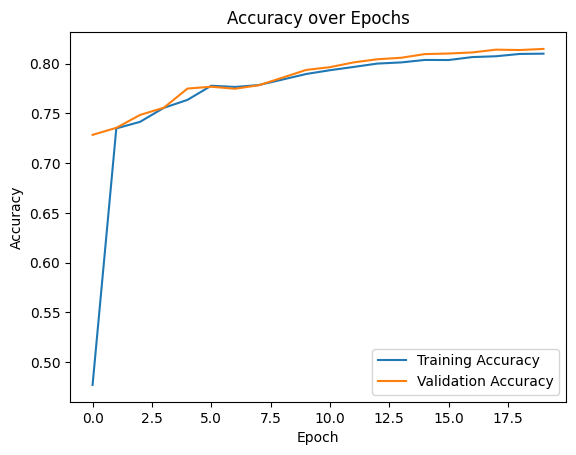

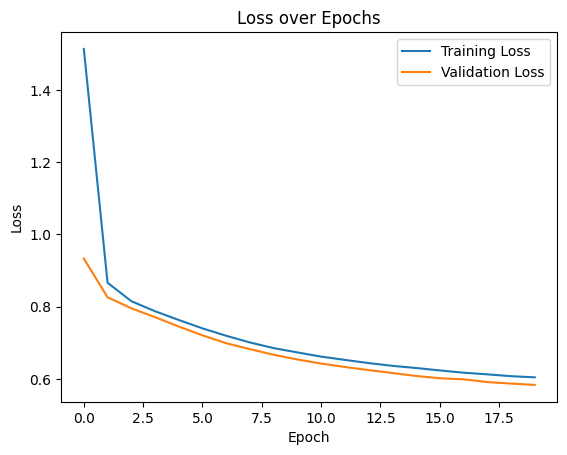

In [47]:
import matplotlib.pyplot as plt

# 精度のプロット
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 損失のプロット
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [63]:
import numpy as np

# ランダムにインデックスを5つ選ぶ（重複なし）
random_indices = np.random.choice(len(df), size=5, replace=False)

# 特徴量を取得し標準化
sample_rows = df.drop("ModelCode", axis=1).iloc[random_indices]
sample_scaled = scaler.transform(sample_rows)

# 予測
pred_probs = model.predict(sample_scaled)
predicted_modelcodes = np.argmax(pred_probs, axis=1) + 1  # 1〜9に戻す
true_modelcodes = df["ModelCode"].iloc[random_indices].values

# 表示
for i, idx in enumerate(random_indices):
    confidence = np.max(pred_probs[i])
    print(f"\n📌 選択: {idx+1} 行目")
    print(f"▶️ 推定ModelCode: {predicted_modelcodes[i]}")
    print(f"✅ 実際のModelCode: {true_modelcodes[i]}")
    print(f"📊 確率分布: {pred_probs[i]}")
    print(f"🔒 自信スコア（最大確率）: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

📌 選択: 25457 行目
▶️ 推定ModelCode: 7
✅ 実際のModelCode: 7
📊 確率分布: [4.0812516e-05 9.4588177e-05 1.3141055e-05 1.6209152e-17 1.9468250e-03
 5.0109735e-17 9.9566615e-01 1.2362173e-05 2.2260626e-03]
🔒 自信スコア（最大確率）: 0.9957

📌 選択: 4435 行目
▶️ 推定ModelCode: 5
✅ 実際のModelCode: 5
📊 確率分布: [1.20242212e-05 3.34902039e-09 1.10485225e-07 2.19971066e-33
 9.99695778e-01 8.72277789e-20 1.78609102e-04 1.61243395e-06
 1.11828071e-04]
🔒 自信スコア（最大確率）: 0.9997

📌 選択: 20321 行目
▶️ 推定ModelCode: 7
✅ 実際のModelCode: 3
📊 確率分布: [3.2586552e-04 1.3256443e-03 8.7637417e-02 7.0122960e-06 2.6378799e-02
 6.5910777e-11 8.8361287e-01 9.3403487e-06 7.0300873e-04]
🔒 自信スコア（最大確率）: 0.8836

📌 選択: 22692 行目
▶️ 推定ModelCode: 7
✅ 実際のModelCode: 7
📊 確率分布: [7.7272898e-06 1.5624417e-05 6.4477582e-08 2.7721067e-22 1.1594773e-02
 2.2913149e-19 9.8820591e-01 9.7242402e-05 7.8597302e-05]
🔒 自信スコア（最大確率）: 0.9882

📌 選択: 6227 行目
▶️ 推定ModelCode: 7
✅ 実際のModelCode: 7
📊 確率分布: [8.5653369e-07 3.3581791e-06 6.8353652e-09 1.34237

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20803 (\N{CJK UNIFIE

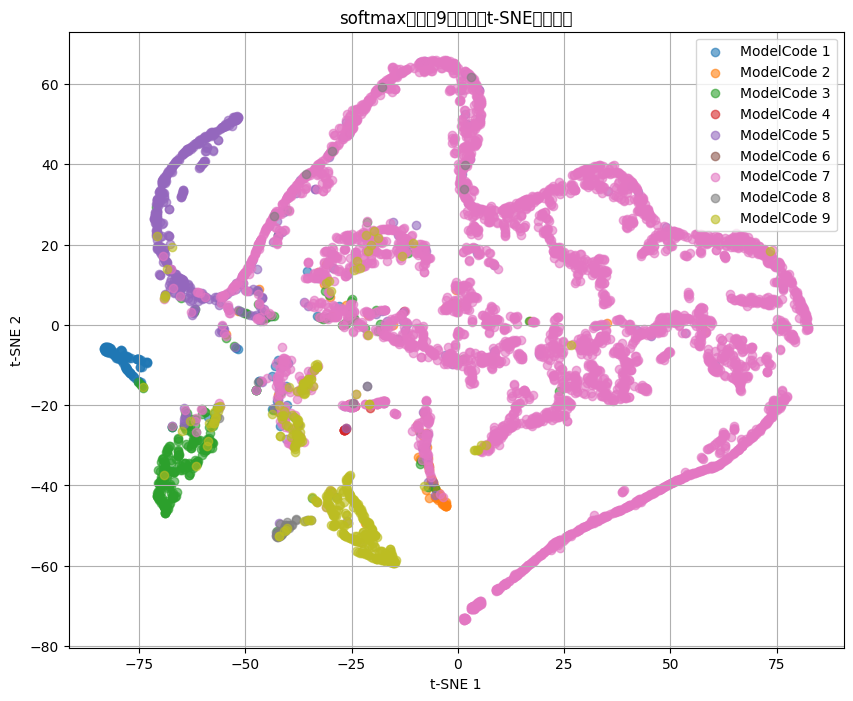

In [60]:
# 最終出力（softmax確率）を取得
softmax_output = model.predict(X_val)  # shape: (N, 9)

# t-SNEで2次元へ変換
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(softmax_output)

# ラベルは元のModelCode（1〜9）に戻す
y_val_labels = y_val + 1

# 可視化
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(1, 10):
    idx = (y_val_labels == i)
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=f'ModelCode {i}', alpha=0.6)

plt.title("softmax出力（9次元）をt-SNEで可視化")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.9

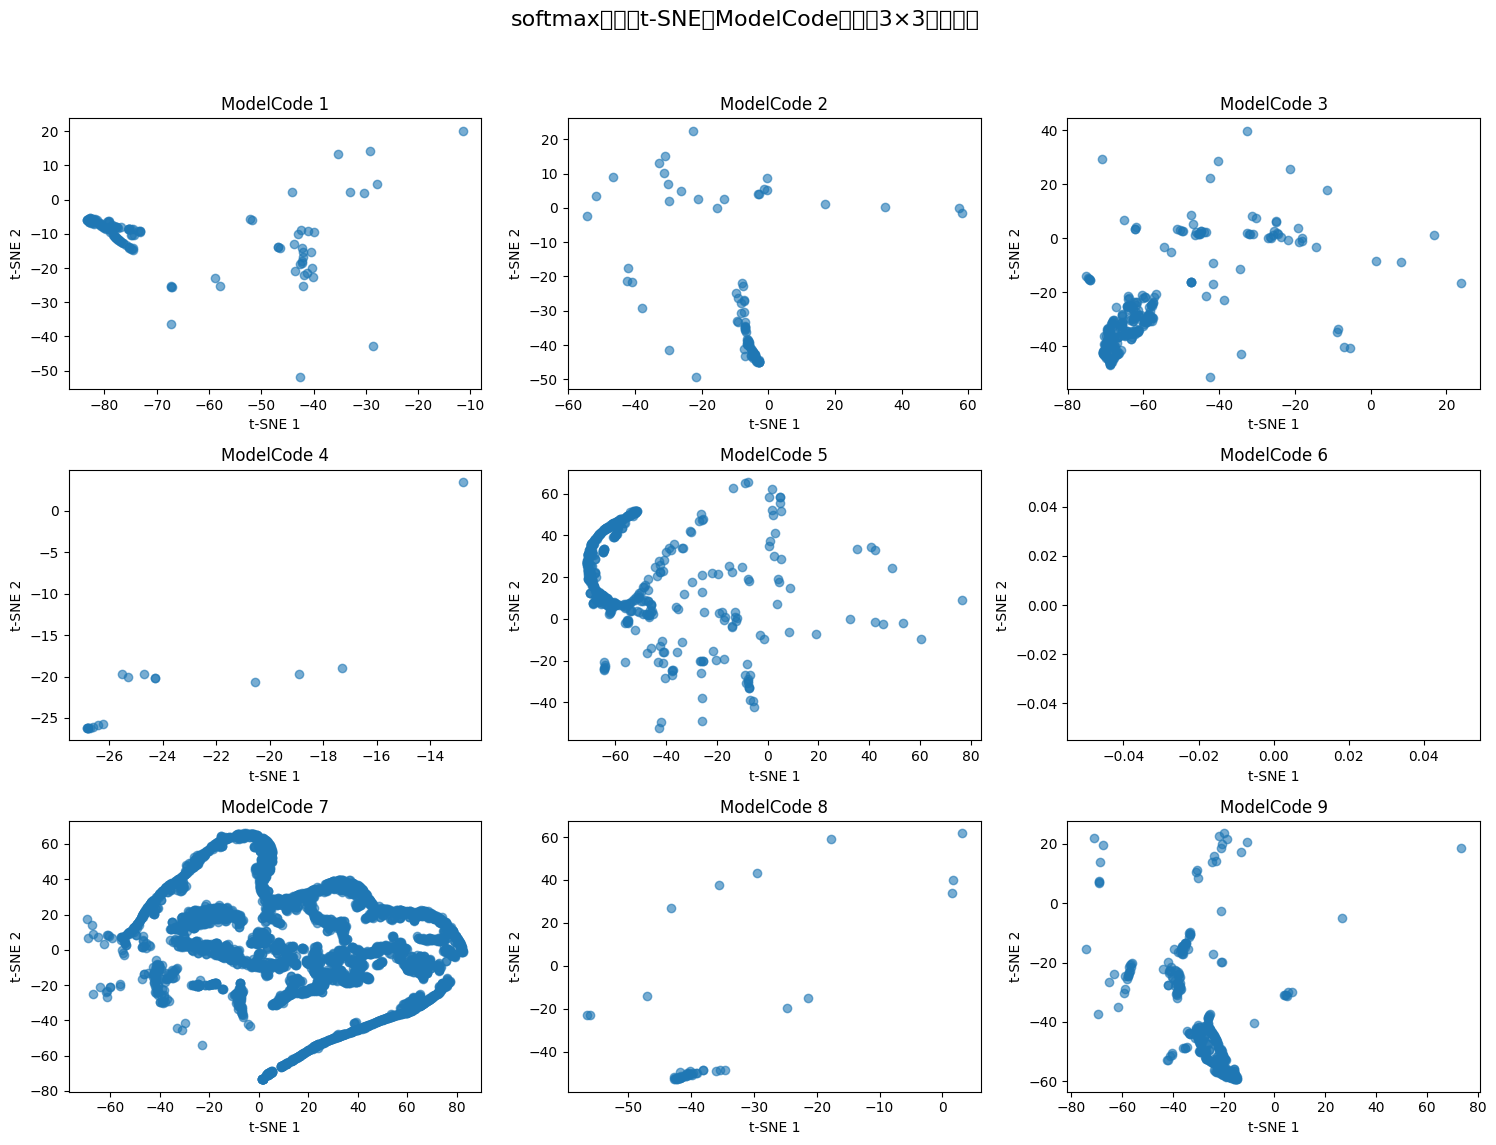

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# softmax出力を取得
softmax_output = model.predict(X_val)

# t-SNEで2次元に圧縮
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(softmax_output)

# ラベルを元の1〜9に戻す
y_val_labels = y_val + 1

# 3×3 のサブプロットを作成
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("softmax出力のt-SNE（ModelCodeごとに3×3で表示）", fontsize=16)

# 各 ModelCode に対してプロット
for i in range(1, 10):
    ax = axes[(i-1)//3, (i-1)%3]
    idx = (y_val_labels == i)
    ax.scatter(X_tsne[idx, 0], X_tsne[idx, 1], alpha=0.6, color='tab:blue')
    ax.set_title(f'ModelCode {i}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
